In [316]:
import numpy as np
import numpy_financial as npf

obecna_wartosc_mieszkania = 120000
rateM = 0.05/12
rateL = 0.12/12
nper = 5*12
cena_mieszkania_za_5_lat  = np.around(obecna_wartosc_mieszkania * (1 + rateM)**nper,2)
cena_mieszkania_za_5_lat

154003.04

# Szacowana cena mieszkania po 5 latach wynosi 154003.04 zł

### Co miesiąc, przez 60 miesiecy, wrzucam tę samą kwotę x na lokatę.
Co miesiąc kwota powieksza się o 1%.
Kwota wrzucona pierwszego miesiąca będzie pracowała przez 60 miesiecy.
I tak:
```
pierwszy x będzie pracował x*(1,01)**60
drugi odłozony x będzie pracował x*(1,01)**59
trzeci odłozony x będzie pracował x*(1,01)**58
...
...
...
sześcdziesiąty odłozony x będzie pracował x*(1,01)```
Sumując te wszystkie odłożone x wraz z odsetkami mamy uzyskać 154 003.04 zł

In [317]:
periods = np.arange(nper,0,-1)

In [318]:
oprocentowanie = np.around(np.array((1+rateL)**periods),2)

In [319]:
wplata_miesieczna = np.around(cena_mieszkania_za_5_lat/sum(oprocentowanie),2)
wplata_miesieczna

1867.61

# Co miesiąc należy na lokatę wpłacać 1867.61 zł, aby po 5 latach móc kupić mieszkanie za 154003.04 zł.

In [320]:
periodsL = np.arange(1,nper,dtype=int)
wartosc_lokaty = [wplata_miesieczna*(1+rateL)]
for i in periodsL:
    x = np.around(((wartosc_lokaty[i-1]+wplata_miesieczna)*(1+rateL)),2)
    wartosc_lokaty.append(x)
wartosc_lokaty = np.array(wartosc_lokaty)
wartosc_lokaty

array([  1886.2861,   3791.44  ,   5715.64  ,   7659.08  ,   9621.96  ,
        11604.47  ,  13606.8   ,  15629.15  ,  17671.73  ,  19734.73  ,
        21818.36  ,  23922.83  ,  26048.34  ,  28195.11  ,  30363.35  ,
        32553.27  ,  34765.09  ,  36999.03  ,  39255.31  ,  41534.15  ,
        43835.78  ,  46160.42  ,  48508.31  ,  50879.68  ,  53274.76  ,
        55693.79  ,  58137.01  ,  60604.67  ,  63097.    ,  65614.26  ,
        68156.69  ,  70724.54  ,  73318.07  ,  75937.54  ,  78583.2   ,
        81255.32  ,  83954.16  ,  86679.99  ,  89433.08  ,  92213.7   ,
        95022.12  ,  97858.63  , 100723.5   , 103617.02  , 106539.48  ,
       109491.16  , 112472.36  , 115483.37  , 118524.49  , 121596.02  ,
       124698.27  , 127831.54  , 130996.14  , 134192.39  , 137420.6   ,
       140681.09  , 143974.19  , 147300.22  , 150659.51  , 154052.39  ])

In [321]:
periodsM = np.arange(1,nper,dtype=int)
wartosc_mieszkania = [obecna_wartosc_mieszkania*(1+rateM)]
for i in periodsM:
    x = np. around(wartosc_mieszkania[i-1]*(1+rateM),2)
    wartosc_mieszkania.append(x)
wartosc_mieszkania = np.array(wartosc_mieszkania)
wartosc_mieszkania


array([120500.  , 121002.08, 121506.26, 122012.54, 122520.93, 123031.43,
       123544.06, 124058.83, 124575.74, 125094.81, 125616.04, 126139.44,
       126665.02, 127192.79, 127722.76, 128254.94, 128789.34, 129325.96,
       129864.82, 130405.92, 130949.28, 131494.9 , 132042.8 , 132592.98,
       133145.45, 133700.22, 134257.3 , 134816.71, 135378.45, 135942.53,
       136508.96, 137077.75, 137648.91, 138222.45, 138798.38, 139376.71,
       139957.45, 140540.61, 141126.2 , 141714.23, 142304.71, 142897.65,
       143493.06, 144090.95, 144691.33, 145294.21, 145899.6 , 146507.52,
       147117.97, 147730.96, 148346.51, 148964.62, 149585.31, 150208.58,
       150834.45, 151462.93, 152094.03, 152727.76, 153364.13, 154003.15])

Text(0, 0.5, 'wartość w zł')

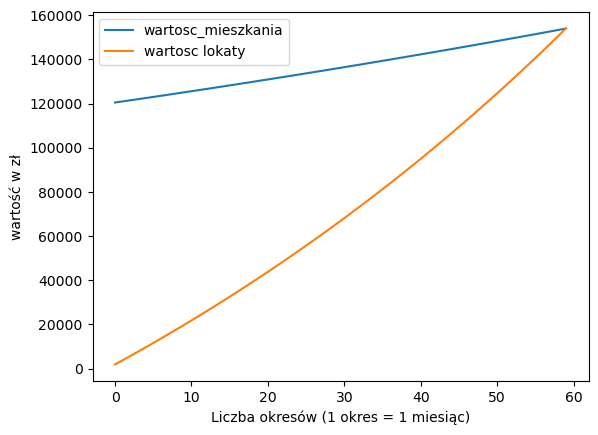

In [322]:
import matplotlib.pyplot as plt

plt.plot(wartosc_mieszkania,label='wartosc_mieszkania')
plt.plot(wartosc_lokaty,label='wartosc lokaty')
plt.legend()
plt.xlabel('Liczba okresów (1 okres = 1 miesiąc)')
plt.ylabel('wartość w zł')